In [1]:
from runner import TestRunner, TestPlan, TestStep
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Print available COM ports (pass to TestPlan __init__).
print(TestRunner.available_ports())

# Datapoints are organized by "keys," available values are below.
print(TestRunner.keys())

['COM11', 'COM4', 'COM5', 'COM3', 'COM7']
['time_ms', 'top_motor_rpm', 'bottom_motor_rpm', 'batt_voltage_V', 'batt_current_A', 'top_current_A', 'bottom_current_A', 'thrust_N', 'torque_N']


In [37]:
# 1. Create a test plan consisting of steps.
steps = [TestStep(bottom_throttle=i, top_throttle=i, duration_ms=5000) for i in range(10, 31, 10)]
plan = TestPlan(
    "test",
    steps=steps
)
plan

TestPlan(name='test', steps=[TestStep(duration_ms=5000, top_throttle=10, bottom_throttle=10, pitch_angle=None, roll_angle=None), TestStep(duration_ms=5000, top_throttle=20, bottom_throttle=20, pitch_angle=None, roll_angle=None), TestStep(duration_ms=5000, top_throttle=30, bottom_throttle=30, pitch_angle=None, roll_angle=None)])

In [41]:
# 2. Connect to jig and run the test.
runner = TestRunner(port="COM11")
runner.run(plan=plan)

Arming...
Running test...
Test complete.


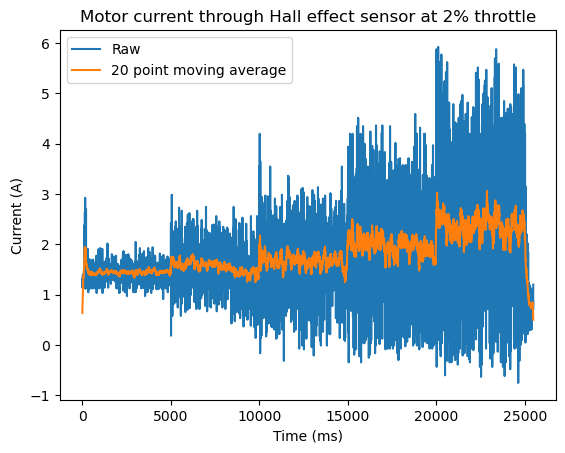

In [27]:
# 3. Plot data or get values as Numpy array.
# runner.plot("bottom_current_A")
time_ms = runner.values("time_ms")
bottom_current = runner.values("bottom_current_A")
plt.plot(time_ms, bottom_current, label='Raw')
flt_current = np.convolve(bottom_current, np.ones(20), 'same') / 20
plt.plot(time_ms, flt_current, label='20 point moving average')
plt.xlabel('Time (ms)')
plt.ylabel('Current (A)')
plt.title('Motor current through Hall effect sensor at 2% throttle')
plt.legend()

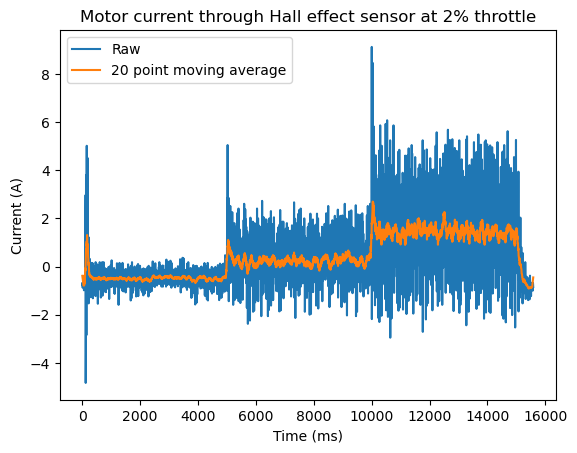

In [42]:
# 3. Plot data or get values as Numpy array.
# runner.plot("bottom_current_A")
time_ms = runner.values("time_ms")
bottom_current = runner.values("top_current_A")
plt.plot(time_ms, bottom_current, label='Raw')
flt_current = np.convolve(bottom_current, np.ones(20), 'same') / 20
plt.plot(time_ms, flt_current, label='20 point moving average')
plt.xlabel('Time (ms)')
plt.ylabel('Current (A)')
plt.title('Motor current through Hall effect sensor at 2% throttle')
plt.legend()

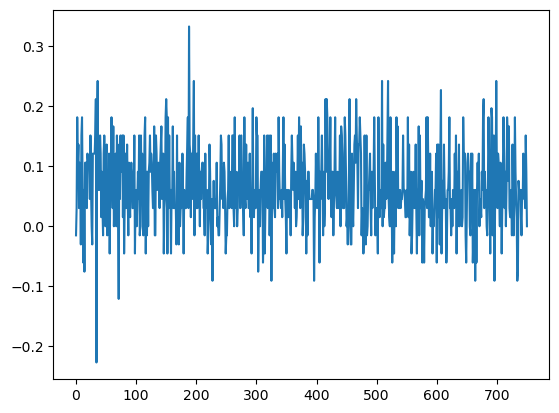

In [108]:
plt.plot(time_ms, runner.values("top_current_A"))
plt.xlabel('Time (ms)')
plt.ylabel('Current (A)')
plt.title('Motor current at 2% throttle')

In [92]:
np.mean(runner.values("top_current_A"))*66

-0.5579280559254327

In [93]:
np.mean(runner.values("bottom_current_A"))*66

-0.40746659920106526

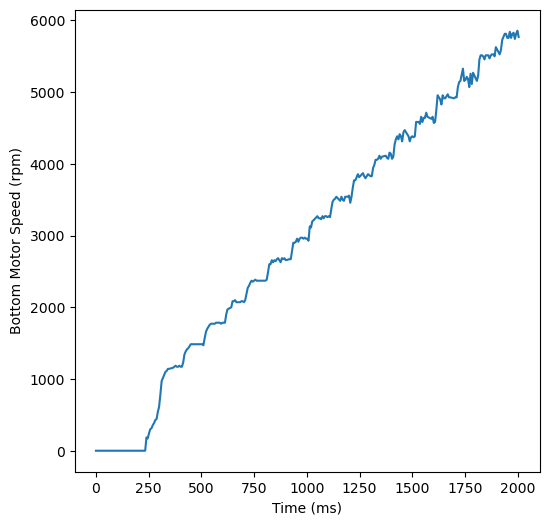

In [43]:
# 4. Save or load from .csv.
runner.save("bottom_motor_test_sweep.csv")

loaded_data = TestRunner.load("example_csv.csv")
loaded_data.plot("bottom_motor_rpm")